# NTDS'18 milestone 1: network collection and properties
[Effrosyni Simou](https://lts4.epfl.ch/simou), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `4`
* Students: `Julien Berger, Jérémy Jayet, Hanah Samet, Mathieu Shiva`
* Dataset: `IMDb Films and Crew `

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to three sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective 

The purpose of this milestone is to start getting acquainted to the network that you will use for this class. In the first part of the milestone you will import your data using [Pandas](http://pandas.pydata.org) and you will create the adjacency matrix using [Numpy](http://www.numpy.org). This part is project specific. In the second part you will have to compute some basic properties of your network. **For the computation of the properties you are only allowed to use the packages that have been imported in the cell below.** You are not allowed to use any graph-specific toolboxes for this milestone (such as networkx and PyGSP). Furthermore, the aim is not to blindly compute the network properties, but to also start to think about what kind of network you will be working with this semester. 

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## Part 1 - Import your data and manipulate them. 

###  A. Load your data in a Panda dataframe.

First, you should define and understand what are your nodes, what features you have and what are your labels. Please provide below a Panda dataframe where each row corresponds to a node with its features and labels. For example, in the the case of the Free Music Archive (FMA) Project, each row of the dataframe would be of the following form:


| Track   |  Feature 1  | Feature 2 | . . . | Feature 518|  Label 1 |  Label 2 |. . .|Label 16|
|:-------:|:-----------:|:---------:|:-----:|:----------:|:--------:|:--------:|:---:|:------:|
|         |             |           |       |            |          |          |     |        |

It is possible that in some of the projects either the features or the labels are not available. This is OK, in that case just make sure that you create a dataframe where each of the rows corresponds to a node and its associated features or labels.

In [2]:
# nodes = cast/crew 
# edges = co-appearance in TV/movies
# features = rating of movies
# labels = movie genres
movies = pd.read_csv('../data/tmdb_5000_movies.csv')
movies['release_date'] = pd.to_datetime(movies['release_date']).apply(lambda x: x.date())
json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
for column in json_columns:
    movies[column] = movies[column].apply(json.loads)
    

    
credits = pd.read_csv('../data/tmdb_5000_credits.csv')
json_columns = ['cast', 'crew']
for column in json_columns:
       credits[column] = credits[column].apply(json.loads)

new_movie_index=np.arange(movies.shape[0])  
movies['id']=new_movie_index
credits['movie_id']=new_movie_index  
    
def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan
    
#credits['gender_of_lead'] = credits.cast.apply(lambda x: safe_access(x, [0, 'gender']))
#credits['lead'] = credits.cast.apply(lambda x: safe_access(x, [0, 'name']))
#df = pd.merge(movies, credits, left_on='id', right_on='movie_id')
#df[['original_title', 'revenue', 'lead', 'gender_of_lead']].sort_values(by=['revenue'], ascending=False)[:10]

credits.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['cast']], axis=1);
credits.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['crew']], axis=1);
credits.apply(lambda row: [person.update({'order': order}) for order, person in enumerate(row['crew'])], axis=1);

cast = []
credits.cast.apply(lambda x: cast.extend(x))
cast = pd.DataFrame(cast)
cast['type'] = 'cast'

crew = []
credits.crew.apply(lambda x: crew.extend(x))
crew = pd.DataFrame(crew)
crew['type'] = 'crew'

people = pd.concat([cast, crew],  ignore_index=True, sort=False)
people = people.drop(columns=['gender','department', 'credit_id','cast_id', 'job','order','character','type'])
people = people.sort_values(by='id')

#remove the rows with similar id and movie
people=people.drop_duplicates(subset=['id', 'movie_id'])

#get the maximum number of movies someone worked on, this will be the number of features we take
maximum_movies=people['id'].value_counts().tolist()
maximum_movies=maximum_movies[0]
table_nb_movies=people['id'].value_counts()
unique_values=people['id'].unique()

   
        
#get the total number of individual "couples" movie+person
number_entries=len(people.index)
movies['movie_id']=movies['id']
movies=movies.drop(columns=['vote_count','budget','genres','homepage','keywords','original_language','overview','popularity','production_companies','production_countries','release_date','revenue','runtime','spoken_languages','status','tagline','original_title'])
movies = movies.set_index('movie_id')
unique_movie_id=people['movie_id'].unique()
unique_movie_id.sort()  
  

    
#merge the movies and the people so that you have the rating    
people = people.merge(movies, on='movie_id')
people['id']=people['id_x']
people = people.drop(columns=['id_x','id_y'])


#this simple_list will contain all the different actor names
simple_list=people.loc[:, ['id','movie_id','name']]
simple_list=simple_list.sort_values(by='id')
simple_list=simple_list.drop_duplicates('id')
simple_list=simple_list.set_index('id') 
simple_list=simple_list.drop(columns=['movie_id'])

#Only 35'000 people did more than 1  movie
#threshold = 5 movies, gives a list of around 9600 people --> good








In [ ]:


#This code takes 14 minutes to run and removes all the people that worked on less than 5 movies
threshold_movies=5
for idx in unique_values:
    nb_films=table_nb_movies[idx] 
    if (nb_films)<threshold_movies:
        simple_list=simple_list.drop(index=idx)


In [ ]:
simple_list = pd.read_csv('simple_list_only_peopleID.csv')

In [ ]:

#Calculate the number of individual movies and people
unique_id=people['id'].unique()
unique_id.sort()
number_people=len(simple_list)

#this isn't usefull anymore

#The size is 104842 --> number of unique people(before cleaning, after it is 9628)
unique_movie_id=people['movie_id'].unique()
unique_movie_id=unique_movie_id.sort()
#number_movies=unique_movie_id.size
#The size is 4782 --> number of unique movies

#Add a column that will contain the average rating of the actor 
simple_list['Average_Rating']=np.nan

#Add a column for each movie (based on the highest number of movie for 1 individual)
#for i in range(maximum_movies):
#    simple_list['Movie_%d' % i]=np.nan
    
for i in new_movie_index:
    simple_list['Movie_ID_%d' % i]=0
simple_list



In [ ]:
simple_list = pd.read_csv('simple_list_with_columns.csv')
simple_list

In [ ]:
#This code takes 5 minutes to run and adds all the movies ID on the correct row of simple list

# We take a subset of the big list (people) with all the movies 1 person starred in (or worked on)
# We then place them in the corresponding row in the simple_list
# We also calculate the Average rating of the actor and place it in the simple_list
unique_id=simple_list['id'].unique()
unique_id.sort()
index_ini=0
#for idx unique_id:
for idx in unique_id:
    rating_average=0
    subset=people[people['id'] == idx]
    new_index_subset = pd.Series(range(0,len(subset)))
    subset=subset.set_index(new_index_subset) 
    index_person=subset.iloc[0,4]
    
    for i in new_index_subset:
        index_film=subset.iloc[i-1,0]+3
        #simple_list.loc[idx, 'Movie_ID_%d' % index_film]=1
        simple_list.iloc[index_ini, index_film]=1
        rating_average=rating_average+subset.iloc[i-1,3]
    rating_average=rating_average/len(subset)
        #simple_list.loc[idx, 'Average_Rating']=rating_average
    simple_list.iloc[index_ini, 2]=rating_average
    index_ini=index_ini+1
simple_list

#we save this to a csv for later use    
#simple_list.to_csv('simple_list.csv')    

#This simple list is the features we want to use    
#features = # the pandas dataframe with the features and labels

In [ ]:
unique_id=simple_list['id'].unique()
unique_id.sort()


subset=people[people['id'] == 1]
new_index_subset = pd.Series(range(0,len(subset)))
subset=subset.set_index(new_index_subset)
simple_list.index.values[5]
subset

In [ ]:
simple_list.to_csv('simple_list_wesh.csv') 

In [3]:
features_4800 = pd.read_csv('simple_list_4800features.csv') 
features_4800 = features_4800.drop(features_4800.columns[0],axis=1)
features_4800 = features_4800.drop(columns=['name'],axis=1)
features = pd.read_csv('simple_list_9628.csv')
#features_4800

### B. Create the adjacency matrix of your network.

Remember that there are edges connecting the attributed nodes that you organized in the dataframe above. The connectivity of the network is captured by the adjacency matrix $W$. If $N$ is the number of nodes, the adjacency matrix is an $N \times N$ matrix where the value of $W(i,j)$ is the weight of the edge connecting node $i$ to node $j$.  

There are two possible scenarios for your adjacency matrix construction, as you already learned in the tutorial by Benjamin:

1) The edges are given to you explicitly. In this case you should simply load the file containing the edge information and parse it in order to create your adjacency matrix. See how to do that in the  [graph from edge list]() demo.

2) The edges are not given to you. In that case you will have to create a feature graph. In order to do that you will have to chose a distance that will quantify how similar two nodes are based on the values in their corresponding feature vectors. In the [graph from features]() demo Benjamin showed you how to build feature graphs when using Euclidean distances between feature vectors. Be curious and explore other distances as well! For instance, in the case of high-dimensional feature vectors, you might want to consider using the cosine distance. Once you compute the distances between your nodes you will have a fully connected network. Do not forget to sparsify by keeping the most important edges in your network.

Follow the appropriate steps for the construction of the adjacency matrix of your network and provide it in the Numpy array ``adjacency`` below: 

In [ ]:
n_nodes=len(features)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

#test on only the 15 first rows
for i in range(200):
    for j in range(i+1,n_nodes):
        nb_common_movies=len(list(set(features.loc[i]) & set(features.loc[j]))) # pour travailler sur 80 features
        #nb_common_movies=sum(features.iloc[i,3:]*features.iloc[j,3:]) # pour travailler sur 5000 features
        if nb_common_movies==0:      #maybe using <5 to improve sparsing?
            continue
        adjacency[i, j] = nb_common_movies
        adjacency[j, i] = nb_common_movies
        
adjacency[:15, :15]


In [ ]:
#test on only the 15 first rows
for i in range(201,400): #does 201-399
    for j in range(i+1,n_nodes):
        nb_common_movies=len(list(set(features.loc[i]) & set(features.loc[j]))) # pour travailler sur 80 features
        #nb_common_movies=sum(features.iloc[i,3:]*features.iloc[j,3:]) # pour travailler sur 5000 features
        if nb_common_movies==0:      #maybe using <5 to improve sparsing?
            continue
        adjacency[i, j] = nb_common_movies
        adjacency[j, i] = nb_common_movies

np.save('adjacency.npy', adjacency)
adjacency[:15, :15]


In [ ]:

u=adjacency[:1, :]
#u=u!=0
#sum(sum(u)) #this is the number of collaboration of the first person.


In [4]:
#other technique without 2 loops, but still bad
n_nodes=len(features)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)
backup_id=features_4800['id']
backup_rating=features_4800['Average_Rating']
features_4800 = features_4800.drop(columns=['id','Average_Rating'],axis=1)
for idx_mul in range(1000):
    v=features_4800.multiply(features_4800.iloc[idx_mul])
    adjacency[idx_mul]=v.sum(axis=1)
np.fill_diagonal(adjacency, 0)
adjacency[:15, :15]

array([[0, 8, 4, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [8, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [4, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [7, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 7, 7, 1, 3, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 7, 0, 4, 1, 2, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 7, 4, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0]])

In [23]:
n_nodes=len(features)
adjacency = np.load('adjacency.npy')
for idx_mul in range(6000,n_nodes):
    v=features_4800.multiply(features_4800.iloc[idx_mul])
    adjacency[idx_mul]=v.sum(axis=1)
np.fill_diagonal(adjacency, 0)
adjacency[:15, :15]

array([[0, 8, 4, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [8, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [4, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [7, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 7, 7, 1, 3, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 7, 0, 4, 1, 2, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 7, 4, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0]])

In [ ]:
#USE THE 4800 FEATURES MATRIX
n_nodes=len(features)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

#test on only the 15 first rows
for i in range(n_nodes):
    for j in range(i+1,1000):
        #nb_common_movies=len(list(set(features.loc[i]) & set(features.loc[j]))) # pour travailler sur 80 features
            nb_common_movies=sum(features.iloc[i,3:]*features.iloc[j,3:]) # pour travailler sur 5000 features
        if nb_common_movies==0: 
            continue
        adjacency[i, j] = nb_common_movies
        adjacency[j, i] = nb_common_movies
        
adjacency[:15, :15]


In [ ]:
# Your code here
n_nodes=len(features)
#n_nodes=5
#n_nodes = len(nodes)
#n_nodes=len(simple_list)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)


#Complexity: n_nodes*n_nodes/2*nb_column^2 = 9628*9628/2*80^2= 296'634'828'800

for i in range(n_nodes):
    for j in range(i+1,n_nodes):
            #maybe we can sparsify by putting a threshold on the nb of common movies if nb_common_movies<3: continue
            #do not make changes to the matrix if nb_common_movies is equal to 0 --> continue
        nb_common_movies=len(list(set(features.loc[i]) & set(features.loc[j]))) #find a faster way to achieve this comparison
        if nb_common_movies==0:
            continue
        adjacency[i, j] = nb_common_movies
        adjacency[j, i] = nb_common_movies
adjacency
#adjacency = # the adjacency matrix
#n_nodes = # the number of nodes in the network

In [24]:
np.save('adjacency.npy', adjacency)

## Part 2

Execute the cell below to plot the (weighted) adjacency matrix of your network.

Text(0.5, 1.05, 'adjacency matrix')

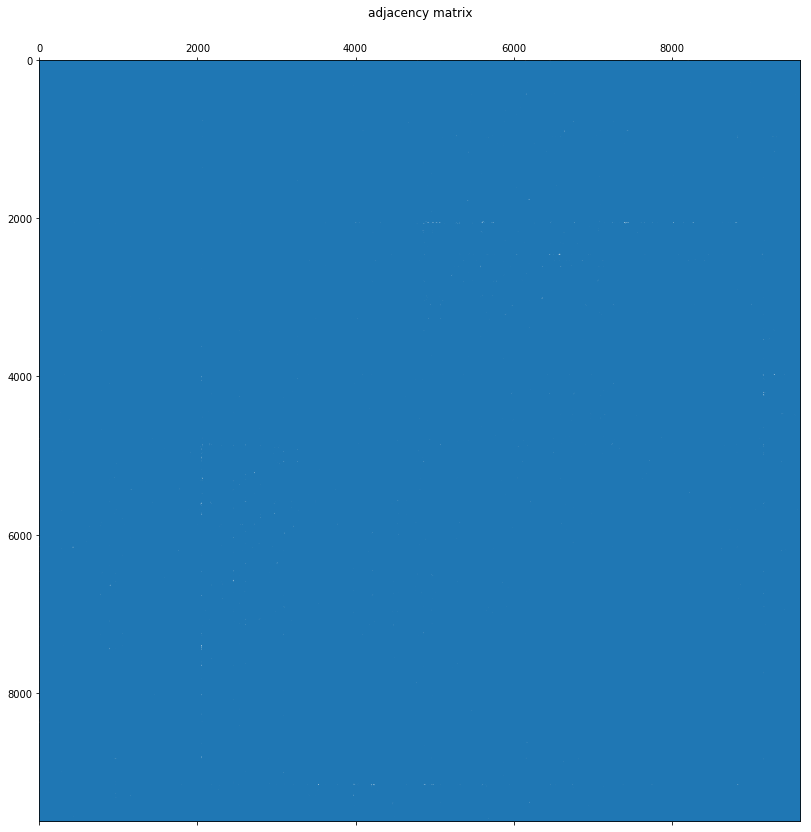

In [25]:
plt.figure(figsize=(14, 14))
plt.spy(adjacency, markersize=1)
plt.title('adjacency matrix')


### Question 1

What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your network)? How many links $L$ are there in your collected network? Comment on the sparsity of your network.

In [ ]:
#use the unweighted matrix
L=sum(adjacency)
L=sum(L)/2 #the number of links in the network
L_max=pd.Series(range(0,n_nodes))
L_max=sum(L_max)
L_max

The maximum number of links in a network is equal to the sum off all number from 1 to N-1 (1+2+3+...+N-2+N-1)
In our case, since N=..., L_max=...
In our network we L links, which means that our network is really sparse in comparison

### Question 2

Is your graph directed or undirected? If it is directed, convert it to an undirected graph by symmetrizing the adjacency matrix.

It is an undirected graph.

In [ ]:
# Your code here.

### Question 3

In the cell below save the features dataframe and the **symmetrized** adjacency matrix. You can use the Pandas ``to_csv`` to save the ``features`` and Numpy's ``save`` to save the ``adjacency``. We will reuse those in the following milestones.

In [ ]:
#features.to_csv('features.csv')
#np.save('adjacency.npy', adjacency)

### Question 4

Are the edges of your graph weighted?

Yes, the weights are equal to the number of movies that two people have in common.

### Question 5

What is the degree distibution of your network? 

In [ ]:
degree =  # Your code here. It should be a numpy array.

assert len(degree) == n_nodes

Execute the cell below to see the histogram of the degree distribution.

In [ ]:
weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights);

What is the average degree?

In [ ]:
# Your code here.

### Question 6

Comment on the degree distribution of your network.

**Your answer here.**

### Question 7

Write a function that takes as input the adjacency matrix of a graph and determines whether the graph is connected or not.

In [ ]:
def breadth_first_search(adjacency, source, destination):
    nodeList = adjacency.shape
    nodeList = nodeList[0]
    nodeList = np.full(nodeList, np.nan)

    queue = np.nonzero(adjacency[source,:])
    queue = np.array(queue[0])

    k = 1

    if source == destination :
        nodeList[destination] = 0

    while np.isnan(nodeList[destination]):
        for i in np.nditer(queue) :
            #print("node = ", i)
            if np.isnan(nodeList[i]) :
                nodeList[i] = k
                tmp = np.nonzero(adjacency[i,:])
                tmp = np.array(tmp[0])
                #print(queue, "+" ,tmp)
                queue = np.concatenate((queue, tmp))


        k = k+1

    distance = nodeList[destination]
    return distance




def connected_graph(adjacency):
    """Determines whether a graph is connected.

    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.

    Returns
    -------
    bool
        True if the graph is connected, False otherwise.
    """

    nodeList = adjacency.shape
    nodeList = nodeList[0]
    nodeList = np.full(nodeList, np.nan)

    nodeList[0] = 1;

    for i in range(0,nodeList.size):
        for j in range(i+1,nodeList.size):
            #print("i=",i,"j=",j, nodeList[j] ,np.isnan(nodeList[j]))
            if nodeList[i] == 1 and np.isnan(nodeList[j]):
                if np.isnan(breadth_first_search(adjacency,i,j)) == False:
                    nodeList[j] = 1
                else:
                    nodeList[j] = 0

    #print(nodeList)

    if np.sum(nodeList) == nodeList.size:
        connected = True
    else:
        connected = False


    return connected

Is your graph connected? Run the ``connected_graph`` function to determine your answer.

In [ ]:
# Your code here.

### Question 8

Write a function that extracts the connected components of a graph.

In [ ]:
def find_components(adjacency):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    
    # Your code here.
    
    return components

How many connected components is your network composed of? What is the size of the largest connected component? Run the ``find_components`` function to determine your answer. 

In [ ]:
# Your code here.

### Question 9

Write a function that takes as input the adjacency matrix and a node (`source`) and returns the length of the shortest path between that node and all nodes in the graph using Dijkstra's algorithm. **For the purposes of this assignment we are interested in the hop distance between nodes, not in the sum of weights. **

Hint: You might want to mask the adjacency matrix in the function ``compute_shortest_path_lengths`` in order to make sure you obtain a binary adjacency matrix. 

In [ ]:
def compute_shortest_path_lengths(adjacency, source):
    """Compute the shortest path length between a source node and all nodes.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    
    Returns
    -------
    list of ints
        The length of the shortest path from source to all nodes. Returned list should be of length n_nodes.
    """
    
    # Your code here.
    
    return shortest_path_lengths

### Question 10

The diameter of the graph is the length of the longest shortest path between any pair of nodes. Use the above developed function to compute the diameter of the graph (or the diameter of the largest connected component of the graph if the graph is not connected). If your graph (or largest connected component) is very large, computing the diameter will take very long. In that case downsample your graph so that it has 1.000 nodes. There are many ways to reduce the size of a graph. For the purposes of this milestone you can chose to randomly select 1.000 nodes. 

In [ ]:
# Your code here.

### Question 11

Write a function that takes as input the adjacency matrix, a path length, and two nodes (`source` and `target`), and returns the number of paths of the given length between them.

In [ ]:
def compute_paths(adjacency, source, target, length):
    """Compute the number of paths of a given length between a source and target node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    target: int
        The target node. A number between 0 and n_nodes-1.
    length: int
        The path length to be considered.
    
    Returns
    -------
    int
        The number of paths.
    """
    
    # Your code here.
    
    return n_paths

Test your function on 5 pairs of nodes, with different lengths.

In [ ]:
print(compute_paths(adjacency, 0, 10, 1))
print(compute_paths(adjacency, 0, 10, 2))
print(compute_paths(adjacency, 0, 10, 3))
print(compute_paths(adjacency, 23, 67, 2))
print(compute_paths(adjacency, 15, 93, 4))

### Question 12

How many paths of length 3 are there in your graph? Hint: calling the `compute_paths` function on every pair of node is not an efficient way to do it.

In [ ]:
# Your code here.

### Question 13

Write a function that takes as input the adjacency matrix of your graph (or of the largest connected component of your graph) and a node and returns the clustering coefficient of that node. 

In [ ]:
def compute_clustering_coefficient(adjacency, node):
    """Compute the clustering coefficient of a node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    node: int
        The node whose clustering coefficient will be computed. A number between 0 and n_nodes-1.
    
    Returns
    -------
    float
        The clustering coefficient of the node. A number between 0 and 1.
    """
    
    # Your code here.
    
    return clustering_coefficient

### Question 14

What is the average clustering coefficient of your graph (or of the largest connected component of your graph if your graph is disconnected)? Use the function ``compute_clustering_coefficient`` to determine your answer.

In [ ]:
# Your code here.